In [7]:
import tensorflow as tf
from tensorflow import keras
import PIL
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pathlib

In [4]:
dataset_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file('Flower_photos', origin=dataset_url, cache_dir='.', untar=True)

   393216/228813984 [..............................] - ETA: 6:15

KeyboardInterrupt: 

In [18]:
data_dir = pathlib.Path('datasets/flower_photos').absolute()
data_dir

PosixPath('/Users/app/Documents/Machine_Learning/deep-learning-keras-tf-tutorial-master/17_data_augmentation/datasets/flower_photos')

In [19]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/Users/app/Documents/Machine_Learning/deep-learning-keras-tf-tutorial-master/17_data_augmentation/datasets/flower_photos')

In [20]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [21]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/Users/app/Documents/Machine_Learning/deep-learning-keras-tf-tutorial-master/17_data_augmentation/datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('/Users/app/Documents/Machine_Learning/deep-learning-keras-tf-tutorial-master/17_data_augmentation/datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('/Users/app/Documents/Machine_Learning/deep-learning-keras-tf-tutorial-master/17_data_augmentation/datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('/Users/app/Documents/Machine_Learning/deep-learning-keras-tf-tutorial-master/17_data_augmentation/datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('/Users/app/Documents/Machine_Learning/deep-learning-keras-tf-tutorial-master/17_data_augmentation/datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [22]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('/Users/app/Documents/Machine_Learning/deep-learning-keras-tf-tutorial-master/17_data_augmentation/datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('/Users/app/Documents/Machine_Learning/deep-learning-keras-tf-tutorial-master/17_data_augmentation/datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('/Users/app/Documents/Machine_Learning/deep-learning-keras-tf-tutorial-master/17_data_augmentation/datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('/Users/app/Documents/Machine_Learning/deep-learning-keras-tf-tutorial-master/17_data_augmentation/datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('/Users/app/Documents/Machine_Learning/deep-learning-keras-tf-tutorial-master/17_data_augmentation/datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

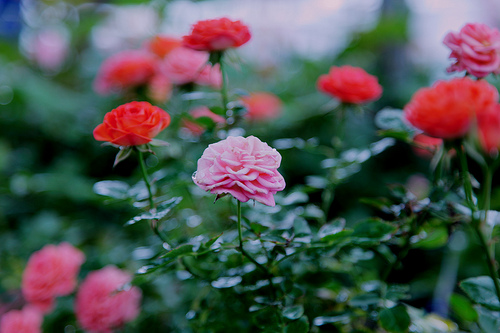

In [23]:
PIL.Image.open(roses[1])

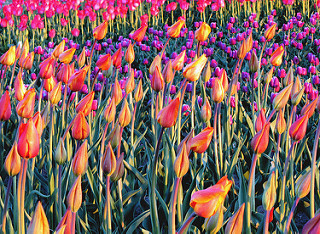

In [24]:
tulpis = list(data_dir.glob('tulips/*'))
PIL.Image.open(tulpis[0])

In [25]:
flower_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'tulips':list(data_dir.glob('tulips/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*'))
    
}

In [26]:
flower_labels_dict={
    'roses':0,
    'tulips':1,
    'sunflowers':2,
    'daisy':3,
    'dandelion':4
}

In [27]:
flower_images_dict['roses'][:5]

[PosixPath('/Users/app/Documents/Machine_Learning/deep-learning-keras-tf-tutorial-master/17_data_augmentation/datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('/Users/app/Documents/Machine_Learning/deep-learning-keras-tf-tutorial-master/17_data_augmentation/datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('/Users/app/Documents/Machine_Learning/deep-learning-keras-tf-tutorial-master/17_data_augmentation/datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('/Users/app/Documents/Machine_Learning/deep-learning-keras-tf-tutorial-master/17_data_augmentation/datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('/Users/app/Documents/Machine_Learning/deep-learning-keras-tf-tutorial-master/17_data_augmentation/datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [28]:
str(flower_images_dict['roses'][0])

'/Users/app/Documents/Machine_Learning/deep-learning-keras-tf-tutorial-master/17_data_augmentation/datasets/flower_photos/roses/16209331331_343c899d38.jpg'

In [29]:
img = cv2.imread(str(flower_images_dict['roses'][0]))

In [30]:
img.shape

(243, 500, 3)

In [31]:
cv2.imread(str(flower_images_dict['roses'][1])).shape

(333, 500, 3)

In [32]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [33]:
x = []
y = []
for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        x.append(resized_img)
        y.append(flower_labels_dict[flower_name])
x = np.array(x)
y = np.array(y)

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, stratify=y)

In [35]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [36]:
num_classes = 5    

model = keras.models.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
#     keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
#     keras.layers.MaxPool2D(),
#     keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
#     keras.layers.MaxPool2D(),
    keras.layers.Flatten(),  
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='sigmoid')
    
])
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_scaled, y_train, epochs=4)

Epoch 1/4
86/86 [==============================] - 16s 159ms/step - loss: 8.3764 - accuracy: 0.3020
Epoch 2/4
86/86 [==============================] - 13s 150ms/step - loss: 1.0878 - accuracy: 0.6032
Epoch 3/4
86/86 [==============================] - 13s 151ms/step - loss: 0.7528 - accuracy: 0.7413
Epoch 4/4
86/86 [==============================] - 14s 161ms/step - loss: 0.5492 - accuracy: 0.8327


In [37]:
model.evaluate(x_test_scaled, y_test)

29/29 [==============================] - 2s 47ms/step - loss: 1.1642 - accuracy: 0.5621


[1.1642155647277832, 0.5620915293693542]

In [38]:
y_pred = model.predict(x_test_scaled)
y_pred[0]

array([0.49613115, 0.34401459, 0.57174146, 0.20480016, 0.6583005 ],
      dtype=float32)

In [39]:
np.argmax(y_pred[1])

2

In [40]:
y_test[1]

2

In [201]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(180, 180, 3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),  
])

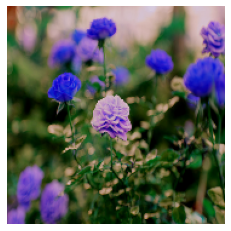

In [202]:
plt.axis('off')
plt.imshow(x[1])

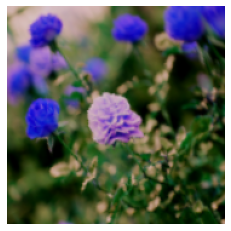

In [156]:
plt.axis('off')
plt.imshow(data_augmentation(x)[1].numpy().astype("uint8"))

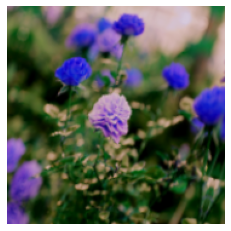

In [272]:
plt.axis('off')
# img = data_augmentation(x[:2])[1]
plt.imshow(data_augmentation(x[:2])[1].numpy().astype('uint8'))

In [159]:
# img.numpy().astype('uint8')

In [131]:
num_classes = 5    

model = keras.models.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
#     keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
#     keras.layers.MaxPool2D(),
#     keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
#     keras.layers.MaxPool2D(),
    keras.layers.Flatten(),  
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='sigmoid')
    
])
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_scaled, y_train, epochs=4)

Epoch 1/4
86/86 [==============================] - 17s 195ms/step - loss: 3.4018 - accuracy: 0.3611
Epoch 2/4
86/86 [==============================] - 17s 199ms/step - loss: 1.1604 - accuracy: 0.5083
Epoch 3/4
86/86 [==============================] - 17s 202ms/step - loss: 1.0456 - accuracy: 0.5921
Epoch 4/4
86/86 [==============================] - 18s 209ms/step - loss: 1.0134 - accuracy: 0.5968


In [32]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 2s 51ms/step - loss: 1.0965 - accuracy: 0.5861


[1.0964645147323608, 0.586056649684906]